[src](https://github.com/jmschrei/pomegranate/blob/master/tutorials/Tutorial_2_General_Mixture_Models.ipynb)

In [1]:
from pomegranate import *
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random', 'log']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(array([   4.,    7.,    5.,   12.,   17.,   29.,   21.,   33.,   31.,
          26.,   17.,   18.,   23.,   51.,  105.,  151.,  115.,   62.,
          17.,    6.]),
 array([ -6.01924703,  -5.13625941,  -4.25327179,  -3.37028417,
         -2.48729655,  -1.60430893,  -0.72132131,   0.16166631,
          1.04465393,   1.92764155,   2.81062917,   3.69361679,
          4.57660441,   5.45959203,   6.34257965,   7.22556727,
          8.10855489,   8.99154251,   9.87453013,  10.75751775,  11.64050537]),
 <a list of 20 Patch objects>)

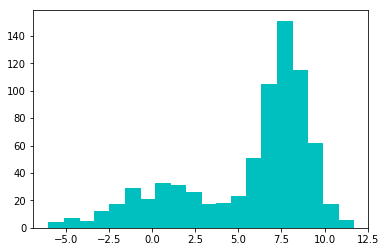

In [2]:
data = np.concatenate( (np.random.randn(250, 1) * 2.75 + 1.25, np.random.randn(500, 1) * 1.2 + 7.85) )
np.random.shuffle(data)
plt.hist( data, edgecolor='c', color='c', bins=20 )

In [13]:
d = GeneralMixtureModel( [NormalDistribution(4, 1), NormalDistribution(4.2, 1)] )


In [4]:
labels = d.predict( data )
print labels[:5]
print "{} 1 labels, {} 0 labels".format( labels.sum(), labels.shape[0] - labels.sum() )

[1 0 1 0 0]
513 1 labels, 237 0 labels


(array([ 13.,  14.,  25.,  29.,  34.,  45.,  55.,  64.,  39.,  39.,  43.,
         47.,  20.,  17.,  11.,   8.,   3.,   5.,   1.,   1.]),
 array([  5.30476007,   5.62154734,   5.9383346 ,   6.25512186,
          6.57190913,   6.88869639,   7.20548366,   7.52227092,
          7.83905819,   8.15584545,   8.47263272,   8.78941998,
          9.10620725,   9.42299451,   9.73978178,  10.05656904,
         10.37335631,  10.69014357,  11.00693084,  11.3237181 ,  11.64050537]),
 <a list of 20 Patch objects>)

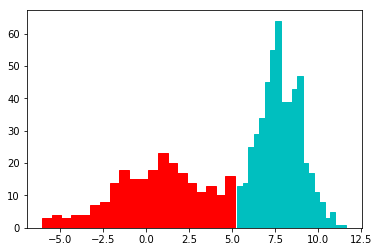

In [5]:
plt.hist( data[ labels == 0 ], edgecolor='r', color='r', bins=20 )
plt.hist( data[ labels == 1 ], edgecolor='c', color='c', bins=20 )

In [6]:
labels = d.predict_proba( data )
print labels[:5]
print labels.sum(axis=0)

[[  1.84064174e-02   9.81593583e-01]
 [  9.99953774e-01   4.62257968e-05]
 [  1.31906523e-03   9.98680935e-01]
 [  1.00000000e+00   9.06934308e-11]
 [  1.00000000e+00   6.43895689e-23]]
[ 238.29078508  511.70921492]


In [14]:
d.fit( data, verbose=True )

[1] Improvement: 4704.62983705	Time (s): 0.00038
[2] Improvement: 48.6558389711	Time (s): 0.0004611
[3] Improvement: 67.8956912674	Time (s): 0.0002801
[4] Improvement: 52.5595995989	Time (s): 0.0002189
[5] Improvement: 16.4915687861	Time (s): 0.0002298
[6] Improvement: 3.58410521608	Time (s): 0.0004301
[7] Improvement: 1.28221239665	Time (s): 0.0002148
[8] Improvement: 0.860557394002	Time (s): 0.000191
[9] Improvement: 0.707502005913	Time (s): 0.000211
[10] Improvement: 0.592864122005	Time (s): 0.0001829
[11] Improvement: 0.487044701331	Time (s): 0.000304
[12] Improvement: 0.388858519637	Time (s): 0.000216
[13] Improvement: 0.301083504534	Time (s): 0.000196
[14] Improvement: 0.226156104026	Time (s): 0.000195
[15] Improvement: 0.165097047627	Time (s): 0.000196
[16] Improvement: 0.117445515326	Time (s): 0.0002639
[17] Improvement: 0.0816650066383	Time (s): 0.000303
Total Improvement: 4899.02712721
Total Time (s): 0.0062


4899.0271272110895

In [15]:
d

{
    "weights" : [
        -1.1278402492954325,
        -0.3911653610790885
    ],
    "distributions" : [
        {
            "frozen" : false,
            "class" : "Distribution",
            "parameters" : [
                0.8772013936302435,
                2.8391274060802068
            ],
            "name" : "NormalDistribution"
        },
        {
            "frozen" : false,
            "class" : "Distribution",
            "parameters" : [
                7.793796729253542,
                1.2302672352520636
            ],
            "name" : "NormalDistribution"
        }
    ],
    "class" : "GeneralMixtureModel"
}

In [16]:
mu = np.arange(5)
cov = np.eye(5)

mgs = [ MultivariateGaussianDistribution( mu*i, cov ) for i in range(5) ]
gmm = GeneralMixtureModel( mgs )

In [17]:
data = numpy.random.randn(1000, 5) * 5
for i in range(5):
    data[i::5] += np.arange(5)*i

In [18]:
for i in range(10):
    print "Point {}: logp {}".format( i, gmm.log_probability(data[i]) )

Point 0: logp [-172.36993997]
Point 1: logp [-46.24215348]
Point 2: logp [-71.22246526]
Point 3: logp [-45.85900746]
Point 4: logp [-122.42306335]
Point 5: logp [-32.63991077]
Point 6: logp [-160.65949574]
Point 7: logp [-50.33368762]
Point 8: logp [-24.14626289]
Point 9: logp [-66.76328476]


In [19]:
gmm.fit(data, verbose=True, stop_threshold=1)


[1] Improvement: 43072.4710903	Time (s): 0.00167
[2] Improvement: 28.2046501326	Time (s): 0.001663
[3] Improvement: 10.444926581	Time (s): 0.001626
[4] Improvement: 5.6259734228	Time (s): 0.001538
[5] Improvement: 3.49468356669	Time (s): 0.001512
[6] Improvement: 2.30789867571	Time (s): 0.001401
[7] Improvement: 1.58293609469	Time (s): 0.001647
[8] Improvement: 1.12898353582	Time (s): 0.001504
[9] Improvement: 0.847347950828	Time (s): 0.001508
Total Improvement: 43126.1084903
Total Time (s): 0.0160


43126.10849027851

In [20]:
for i in range(10):
    print "Point {}: logp {}".format( i, gmm.log_probability(data[i]) )

Point 0: logp [-20.74394146]
Point 1: logp [-14.65973898]
Point 2: logp [-15.85992395]
Point 3: logp [-14.9133265]
Point 4: logp [-17.86015508]
Point 5: logp [-15.05826329]
Point 6: logp [-20.10478322]
Point 7: logp [-15.30377613]
Point 8: logp [-14.09150487]
Point 9: logp [-16.021724]


In [21]:
## discrete
d1 = DiscreteDistribution( {'A' : 0.25, 'C': 0.25, 'G' : 0.25, 'T': 0.25 } ) # Background
d2 = DiscreteDistribution( {'A' : 0.05, 'C': 0.45, 'G' : 0.45, 'T': 0.05 } ) # CG rich regions
gmm = GeneralMixtureModel( [d1, d2] )

In [22]:
seq = numpy.array(list('CGACATCTGACTACGGCGCGCCTACTACTTGATCGATACGGCGTCAGCGACGACGATGATCGGCATCAGTCACTAC'))
gmm.fit(seq)

3.4766541840931495

In [24]:
print gmm.distributions
print
print numpy.exp(gmm.weights)
print gmm

[ {
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "A" :0.3500000000000001,
            "C" :0.19999999999999993,
            "T" :0.29166666666666674,
            "G" :0.15833333333333327
        }
    ],
    "name" :"DiscreteDistribution"
}
 {
    "frozen" :false,
    "class" :"Distribution",
    "parameters" :[
        {
            "A" :0.0905172413793103,
            "C" :0.46551724137931033,
            "T" :0.07543103448275859,
            "G" :0.3685344827586208
        }
    ],
    "name" :"DiscreteDistribution"
}]

[ 0.56390977  0.43609023]
{
    "weights" : [
        -0.5728610146854433,
        -0.8299061176753344
    ],
    "distributions" : [
        {
            "frozen" : false,
            "class" : "Distribution",
            "parameters" : [
                {
                    "A" : 0.3500000000000001,
                    "C" : 0.19999999999999993,
                    "T" : 0.29166666666666674,
                    "G" :